In [3]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

## Loading data

In [4]:
# Load libraries
import sklearn
import joblib

# Get scikit-learn version
scikit_version = sklearn.__version__

# Load the model
pipe = joblib.load("models/model_{version}.pkl".format(version=scikit_version))

# Save the model as pickle file for the web app
joblib.dump(pipe, "web/models/model_{version}.pkl".format(version=scikit_version))

# display the model
pipe

Pipeline(steps=[('preprocess', Pipeline(steps=[('scale', StandardScaler())])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        max_features=14, n_estimators=29))])

# Preparation of data

In [5]:
# load libraries
import pandas as pd

data_train_featured = pd.read_csv('data_p7/cleaned/data_train_featured.csv', index_col='SK_ID_CURR')
print('Featured training data set shape: ', data_train_featured.shape)
data_train_featured.head()

Featured training data set shape:  (307511, 40)


,EXT_SOURCE_2,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,...,ORGANIZATION_TYPE_Military,OCCUPATION_TYPE_Laborers,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,ORGANIZATION_TYPE_BusinessEntityType3,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.262949,-9461,406597.5,24700.5,-637,-2120,-1134.0,-3648.0,0.018801,202500.0,...,0,1,0,0,1,0,0,1,0,1
100003,0.622246,-16765,1293502.5,35698.5,-1188,-291,-828.0,-1186.0,0.003541,270000.0,...,0,0,0,0,0,0,0,0,0,0
100004,0.555912,-19046,135000.0,6750.0,-225,-2531,-815.0,-4260.0,0.010032,67500.0,...,0,1,0,0,0,0,0,1,0,0
100006,0.650442,-19005,312682.5,29686.5,-3039,-2437,-617.0,-9833.0,0.008019,135000.0,...,0,1,0,0,1,0,0,0,0,0
100007,0.322738,-19932,513000.0,21865.5,-3038,-3458,-1106.0,-4311.0,0.028663,121500.0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
from sklearn.impute import SimpleImputer

# Split features and targets
target_train = data_train_featured['TARGET']
data_train_featured = data_train_featured.drop(columns='TARGET')
feature_names = data_train_featured.columns
index = data_train_featured.index

# Imputations
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(data_train_featured)
data_train_featured = pd.DataFrame(
    imp_mean.transform(data_train_featured),
    columns=feature_names,
    index=index
)

In [7]:
# Get the predictions of the model (for positive class: default)
y_train_pred = pipe.predict_proba(data_train_featured)[:,1]
y_train_pred = pd.Series(
    y_train_pred,
    index=data_train_featured.index,
)

# Save the predictions
y_train_pred.to_csv(
    'data_p7/cleaned/target_train_predictions.csv',
    header='TARGET')

## Sampling for web app

In [8]:
# Sampling
data_processed = data_train_featured.sample(n=5000, random_state=42)

# Save the sample for web app
data_processed.to_csv('web/data/data_processed.csv')

# Display
data_processed

,EXT_SOURCE_2,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,...,OCCUPATION_TYPE_Drivers,ORGANIZATION_TYPE_Military,OCCUPATION_TYPE_Laborers,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,ORGANIZATION_TYPE_BusinessEntityType3,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,0.604894,-13297.0,465457.5,52641.0,-762.0,-4307.0,-2.0,-637.0,0.009630,207000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
214010,0.425351,-14778.0,1281712.5,48946.5,-1141.0,-4546.0,-1071.0,-1610.0,0.006852,247500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
142232,0.531760,-17907.0,495000.0,39109.5,-639.0,-1461.0,-1435.0,-2507.0,0.035792,202500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389171,0.693521,-19626.0,254700.0,24939.0,-6982.0,-3158.0,-2000.0,-11167.0,0.046220,247500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
283617,0.560690,-20327.0,308133.0,15862.5,-1105.0,-494.0,-173.0,-7299.0,0.018850,112500.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200560,0.530584,-11537.0,254700.0,27153.0,-664.0,-1623.0,-751.0,-2653.0,0.018029,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244334,0.713252,-24998.0,254700.0,25191.0,-738.0,-3947.0,0.0,-11288.0,0.022625,85500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432795,0.020676,-11111.0,417024.0,32877.0,-1312.0,-3658.0,-283.0,-5193.0,0.010032,135000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Preparation of initial data

In [9]:
import pandas as pd

data_train_original = pd.read_csv('data_p7/input/application_train.csv', index_col='SK_ID_CURR')
print('Original training set (application_set) shape: ', data_train_original.shape)

Original training set (application_set) shape:  (307511, 121)


In [10]:
mask = data_train_original.index.isin(data_train_featured.index)

# Keep only points that are in the engineered set
data_train_original = data_train_original[mask]

# Drop target column
data_train_original = data_train_original.drop(columns='TARGET')

In [11]:
# Sampling
data_original = data_train_original.sample(n=5000, random_state=42)

# Save the sample for web app
data_original.to_csv('web/data/data_original.csv')

# Display
data_original

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
214010,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
142232,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
389171,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
283617,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200560,Cash loans,F,N,Y,0,135000.0,254700.0,27153.0,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
244334,Cash loans,F,N,Y,0,85500.0,254700.0,25191.0,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
432795,Cash loans,M,N,N,0,135000.0,417024.0,32877.0,360000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from sklearn.impute import SimpleImputer

# Imputation of missing values for numerical features
numerical_features = list(data_train_original.select_dtypes(include='number').columns)
data_train_original[numerical_features] = SimpleImputer(strategy='mean').fit_transform(data_train_original[numerical_features])

# Imputation of missing values for categorical features
categorical_features = list(data_train_original.select_dtypes(include='object').columns)
data_train_original[categorical_features] = SimpleImputer(strategy='constant', fill_value='missing').fit_transform(data_train_original[categorical_features])

# Display results
print("Remaining missing values:", data_train_original.isna().any().any())

Remaining missing values: False


### Categorial data encoding

In [13]:
def OneHotEncode(myData):
    from numpy import array
    from sklearn.preprocessing import OneHotEncoder
    # make a 2D array
    myData = myData.values.reshape(len(myData), 1) 
    # set up the OneHotEncoder
    enc = OneHotEncoder(sparse=False)
    # One hot Encode the data
    myData = enc.fit_transform(myData)
    #display(myData.shape)
    #display(myData)
    return myData

In [14]:
# label encoding of each categorical feature
categorical_names = {} # dictionnary of modalities for each cat. feature
label_encoders = {} # dictionnary of encoders for each cat. feature
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    data_train_original.loc[:, feature] = le.fit_transform(data_train_original.loc[:, feature])
    categorical_names[feature] = le.classes_
    label_encoders[feature] = le
for feature in categorical_features:
    data_train_original[feature] = OneHotEncode(data_train_original[feature])
# Save the processed original data
data_train_original.to_csv('data_p7/cleaned/data_train_original.csv')

In [15]:
# Sampling
data_original_le = data_train_original.sample(n=5000, random_state=42)

# Save the sample for web app
data_original_le.to_csv('web/data/data_original_le.csv')

# Display
data_original_le

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
384575,1.0,0.0,0.0,1.0,2.0,207000.0,465457.5,52641.0,418500.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,1.000000,0.000000,1.000000
214010,1.0,1.0,0.0,0.0,0.0,247500.0,1281712.5,48946.5,1179000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,1.000000,0.000000,3.000000
142232,1.0,1.0,0.0,1.0,0.0,202500.0,495000.0,39109.5,495000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,1.000000,0.000000,3.000000
389171,1.0,1.0,1.0,0.0,0.0,247500.0,254700.0,24939.0,225000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
283617,1.0,0.0,1.0,0.0,0.0,112500.0,308133.0,15862.5,234000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200560,1.0,1.0,1.0,0.0,0.0,135000.0,254700.0,27153.0,225000.0,0.0,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
244334,1.0,1.0,1.0,0.0,0.0,85500.0,254700.0,25191.0,225000.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
432795,1.0,0.0,1.0,1.0,0.0,135000.0,417024.0,32877.0,360000.0,0.0,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974


# Surrogate model

## Global interpretation

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Instanciate a surrogate model without depth limit to overfit
sur_dt = DecisionTreeRegressor()

# Over-fitting the surrogate model on original features
sur_dt.fit(data_train_original, y_train_pred)

DecisionTreeRegressor()

In [17]:
# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the model as pickle file
joblib.dump(sur_dt, "web/models/surrogate_model_{version}.pkl".format(version=scikit_version))

['web/models/surrogate_model_0.24.2.pkl']

In [18]:
print("Main features per importance:")
# 'feature_importances_' to get feature rank by importance from decision tree 
sum_val = 0
for col, val in sorted(zip(data_train_original.columns, sur_dt.feature_importances_,), 
                       key=lambda x: x[1], reverse=True,)[:10]:
    print(f"{col:28}{val:10.3f}")
    sum_val += val
    
print("Percentage of the model explained by the 10 first features:", sum_val*100)

Main features per importance:
EXT_SOURCE_2                     0.639
DAYS_BIRTH                       0.115
DAYS_EMPLOYED                    0.057
CODE_GENDER                      0.047
DAYS_ID_PUBLISH                  0.018
AMT_ANNUITY                      0.015
FLAG_DOCUMENT_3                  0.013
AMT_CREDIT                       0.013
DAYS_LAST_PHONE_CHANGE           0.010
AMT_GOODS_PRICE                  0.008
Percentage of the model explained by the 10 first features: 93.43561285921784


## Local interpretation

In [19]:
SK_ID_CURR = 100002
application_data = data_train_original.loc[SK_ID_CURR:SK_ID_CURR]

print("Application ID:", SK_ID_CURR)
print("Predicted value:", y_train_pred.loc[SK_ID_CURR])

Application ID: 100002
Predicted value: 0.2360902606538708


In [20]:
#pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti

# Computation of the prediction, bias and contribs from surrogate model
prediction, bias, contribs = ti.predict(sur_dt, application_data)

print("Prediction:", prediction)

print("Bias (trainset mean):", bias)

print("Main features contributions:")
for contrib, feature in sorted(zip(contribs[0], data_train_original.columns), key=lambda x: abs(x[0]), reverse=True,):
    if contrib != 0:
        print("   {:32}{}".format(feature, contrib))

Prediction: [[0.23609026]]
Bias (trainset mean): [0.08056275]
Main features contributions:
   EXT_SOURCE_2                    0.037999029520169994
   DAYS_BIRTH                      0.020886086230547052
   DEF_30_CNT_SOCIAL_CIRCLE        0.020549875543073443
   CODE_GENDER                     0.016659725711958145
   DAYS_EMPLOYED                   0.015597183284680377
   FLAG_DOCUMENT_3                 0.008676577017988352
   AMT_REQ_CREDIT_BUREAU_YEAR      0.006467677872999317
   AMT_ANNUITY                     0.006238897113609393
   LIVINGAPARTMENTS_MODE           0.00453221488765812
   AMT_CREDIT                      0.004037175078281996
   DAYS_LAST_PHONE_CHANGE          0.003639516263894499
   OBS_30_CNT_SOCIAL_CIRCLE        0.0034497070267597296
   CNT_FAM_MEMBERS                 0.003019439145312247
   OWN_CAR_AGE                     0.0025183111879378828
   NONLIVINGAREA_MEDI              0.002287055074652239
   NAME_FAMILY_STATUS              -0.0020964669918639156
   FLOORSM

## Graphs

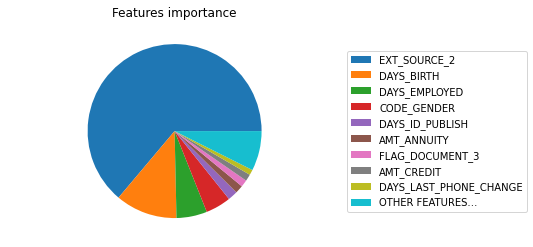

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# initialization
sum_val = 0
labels = []
frequencies = []

# get the labels and frequencies of 10 most important features
for col, val in sorted(zip(data_train_original.columns, sur_dt.feature_importances_,), key=lambda x: x[1], reverse=True,)[:9]:
    labels.append(col)
    frequencies.append(val)
    sum_val += val

# complete the data with other features
labels.append("OTHER FEATURES…")
frequencies.append(1 - sum_val)

fig, ax = plt.subplots()
ax.axis("equal")
ax.pie(frequencies,
        # autopct="%1.1f pourcents",
      )
plt.title("Features importance")
plt.legend(
    labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
)
plt.show()
fig.savefig('plots/FI.png')

# Description of variables

In [22]:
# Loading the file with descriptions
features_descriptions = pd.read_csv('data_p7/Input/HomeCredit_columns_description.csv', encoding='iso-8859-1')
features_descriptions.head(10)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [23]:
features_descriptions_best_global = features_descriptions[features_descriptions['Row'].isin([
       'EXT_SOURCE_2','DAYS_BIRTH','AMT_CREDIT ','AMT_ANNUITY','NAME_EDUCATION_TYPE','CODE_GENDER'
    ,'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_3','DAYS_ID_PUBLISH','DAYS_REGISTRATION'
])]

In [24]:
features_descriptions_best_global

,Unnamed: 0,Table,Row,Description,Special
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
13,16,application_{train|test}.csv,NAME_EDUCATION_TYPE,Level of highest education the client achieved,NaN
17,20,application_{train|test}.csv,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
19,22,application_{train|test}.csv,DAYS_REGISTRATION,How many days before the application did clien...,time only relative to the application
20,23,application_{train|test}.csv,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application
42,45,application_{train|test}.csv,EXT_SOURCE_2,Normalized score from external data source,normalized
95,98,application_{train|test}.csv,DAYS_LAST_PHONE_CHANGE,How many days before application did client ch...,NaN
97,100,application_{train|test}.csv,FLAG_DOCUMENT_3,Did client provide document 3,NaN
138,141,bureau.csv,AMT_ANNUITY,Annuity of the Credit Bureau credit,NaN


In [25]:
features_descriptions_best_local = features_descriptions[features_descriptions['Row'].isin([
       'EXT_SOURCE_2','DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE',
    'CODE_GENDER','FLAG_DOCUMENT_3','NAME_EDUCATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE','FLAG_WORK_PHONE',
    'OWN_CAR_AGE','DAYS_ID_PUBLISH','FLAG_EMAIL','CNT_FAM_MEMBERS','AMT_CREDIT','COMMONAREA_MODE','LIVINGAREA_AVG'
])]

In [26]:
features_descriptions_best_local

,Unnamed: 0,Table,Row,Description,Special
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
13,16,application_{train|test}.csv,NAME_EDUCATION_TYPE,Level of highest education the client achieved,NaN
17,20,application_{train|test}.csv,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
20,23,application_{train|test}.csv,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application
21,24,application_{train|test}.csv,OWN_CAR_AGE,Age of client's car,NaN
24,27,application_{train|test}.csv,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)",NaN
27,30,application_{train|test}.csv,FLAG_EMAIL,"Did client provide email (1=YES, 0=NO)",NaN
29,32,application_{train|test}.csv,CNT_FAM_MEMBERS,How many family members does client have,NaN
42,45,application_{train|test}.csv,EXT_SOURCE_2,Normalized score from external data source,normalized


In [27]:
# filtering features from 'application_train' table
mask = features_descriptions['Table'] == 'application_{train|test}.csv'
features_descriptions = features_descriptions[mask]

# setting the name of the feature as index
features_descriptions = features_descriptions.set_index('Row')

# keeping only description
features_descriptions = features_descriptions['Description']

# display result
features_descriptions.head()

Row
SK_ID_CURR                                     ID of loan in our sample
TARGET                Target variable (1 - client with payment diffi...
NAME_CONTRACT_TYPE          Identification if loan is cash or revolving
CODE_GENDER                                        Gender of the client
FLAG_OWN_CAR                              Flag if the client owns a car
Name: Description, dtype: object

In [28]:
# Checking the result
for column in data_train_original.columns[:5]:
    print(column, features_descriptions[column])

NAME_CONTRACT_TYPE Identification if loan is cash or revolving
CODE_GENDER Gender of the client
FLAG_OWN_CAR Flag if the client owns a car
FLAG_OWN_REALTY Flag if client owns a house or flat
CNT_CHILDREN Number of children the client has


In [29]:
# Save the data for web app
features_descriptions.to_csv('web/data/features_descriptions.csv', header='description')

In [30]:
features_descriptions

Row
SK_ID_CURR                                             ID of loan in our sample
TARGET                        Target variable (1 - client with payment diffi...
NAME_CONTRACT_TYPE                  Identification if loan is cash or revolving
CODE_GENDER                                                Gender of the client
FLAG_OWN_CAR                                      Flag if the client owns a car
                                                    ...                        
AMT_REQ_CREDIT_BUREAU_DAY     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_WEEK    Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_MON     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_QRT     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_YEAR    Number of enquiries to Credit Bureau about the...
Name: Description, Length: 122, dtype: object

# Aggregated data

In [31]:
import pandas as pd

data_train_original = pd.read_csv('data_p7/input/application_train.csv', index_col='SK_ID_CURR')
print('Original training set (application_set) shape: ', data_train_original.shape)

Original training set (application_set) shape:  (307511, 121)


In [32]:
data_train_original.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Aggregate the data from loan applications
data_agg_num = data_train_original.mean(numeric_only=True)
data_agg_cat = data_train_original.select_dtypes(exclude='number').mode().iloc[0]
data_agg = pd.concat([data_agg_num, data_agg_cat])

In [34]:
# Drop the target
data_agg = data_agg.drop('TARGET')

In [35]:
# Save the data for web app
data_agg.to_csv('web/data/data_agg.csv', header='mean or mode', index=True)

In [36]:
data_agg.head(30)

CNT_CHILDREN                        0.417052
AMT_INCOME_TOTAL               168797.919297
AMT_CREDIT                     599025.999706
AMT_ANNUITY                     27108.573909
AMT_GOODS_PRICE                538396.207429
REGION_POPULATION_RELATIVE          0.020868
DAYS_BIRTH                     -16036.995067
DAYS_EMPLOYED                   63815.045904
DAYS_REGISTRATION               -4986.120328
DAYS_ID_PUBLISH                 -2994.202373
OWN_CAR_AGE                        12.061091
FLAG_MOBIL                          0.999997
FLAG_EMP_PHONE                      0.819889
FLAG_WORK_PHONE                     0.199368
FLAG_CONT_MOBILE                    0.998133
FLAG_PHONE                          0.281066
FLAG_EMAIL                           0.05672
CNT_FAM_MEMBERS                     2.152665
REGION_RATING_CLIENT                2.052463
REGION_RATING_CLIENT_W_CITY         2.031521
HOUR_APPR_PROCESS_START            12.063419
REG_REGION_NOT_LIVE_REGION          0.015144
REG_REGION

In [37]:
# aggregated data read
data_agg = pd.read_csv("web/data/data_agg.csv", index_col=0)

In [38]:
data_agg.head(30)

,0
CNT_CHILDREN,0.4170517477423572
AMT_INCOME_TOTAL,168797.9192969845
AMT_CREDIT,599025.9997057016
AMT_ANNUITY,27108.573909183444
AMT_GOODS_PRICE,538396.2074288895
REGION_POPULATION_RELATIVE,0.02086811205778947
DAYS_BIRTH,-16036.995066843137
DAYS_EMPLOYED,63815.04590404896
DAYS_REGISTRATION,-4986.120327538419
DAYS_ID_PUBLISH,-2994.2023732484367
